# <font color='red'> <center>Machine-Learning: Supervised algorithms Part 1 <center/> </font>

## <font color='Green'> <center>Introduction <center/> </font>

### Machine learning PipeLine: Overview
The typical machine learning pipeline consist in the following steps:

<center><img src="../assets/Pipeline.png" width="600"></center>

1. **Data Collection**: collect observations/measurements and make it available to data scientists to build machine learning model. In this tutorials, we will use data publicly available.
2. **Data analysis**: Understand well the dataset and get familiar with the variables and how the variables is correlated/uncorrelated. Define the variable we want to predict  in case of supervised learning(target variable). Define which variables we can use and which ones we cannot use


3. **Feature engineering**: Transform the variables to make them convinient to the machine learning model. Typical features enginnering operations are filling missing values, encode categorical variables, remove outliers, transform distribution (Gaussian vs skewed)
4. **Feature selection**: Finding features that are most predictive and building the model using only those variables. E.g remove correlated variables, constant variables, duplication or quasi constant.

5. **Machine learning model building**: Building different machine learning models, analyze their performance and choose the best ones(model selection). We analyze different metrics such mean square error for regression or accuracy for classification.
6. **Model deployment**: put the model in the cloud or in any other platform where it can be available to other systems in our business. By deploying the model, it means we deploy an entire pipeline.

## <font color='Green'> <center> House price prediction application: Regression problem</center> </font>
- We will go through all the above steps (no model deployment)
- Python programming.
- Numpy
- Pandas library
- Kaggle

### <center>Requirements</center>
- Numpy :Stands for Numerical Python. Python programming library used to work with arrays. It contains different functions that operates on matrices. https://numpy.org/
- Pandas: build on top of numpy, providing easy to use data structure (DataFrame) and data analysis tools.https://pandas.pydata.org/
- Kaggle: It is an online platform for machine learning practioneers. It allows users to publish datasets, build models in a web-based data-science environement, collaborate with others developers, participate to solve challenges. 

### <font color='Green'> <center> Data analysis  </center> </font>

In [1]:
import pandas as pd
import numpy as np

# Plotting tool
import matplotlib.pyplot as plt

# to display all the columns in the DataFrame in the notebook 
pd.pandas.set_option('display.max_columns', None)

In [2]:
# download datasaet from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
# download train.csv and rename it to data.csv

# Load dataset
data = pd.read_csv('data.csv')

# data dimensions
print(data.shape)

# get columns list
features = list(data.columns)
# print(features)
# show few samples from the dataset, by default the first 5 samples
data.head()
#data.info()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# Target value
target = features[-1]
target

'SalePrice'

#### <center>Analysing data to identify:</center>
- Missing values
- Numerical variables
- Categorical variables
- Distribution of numerical variables
- Cardinality of the categorical variables.
- Correlation between the target variables the predictive variables.

In [4]:
# list of variables that contains missing values 
vars_with_nan = [var for var in features if data[var].isnull().sum()>0]
# pourcentage of missing values for each variable
data[vars_with_nan].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

**Note:**

The dataset contains few variables with missing values. However some of them are completely missing such as
`Alley`, `PoolQC`, `Fence` and `MiscFeature`. Those variables could be ignored (we will see that in feature selection).

In [5]:
# Numerical variables list
num_vars = list(data.select_dtypes(include=['number']).columns)
print(f'Number of numerical variables: {len(num_vars)}')

# visualize the first 3 samples of the numerical variables.
data[num_vars].head(3)


Number of numerical variables: 38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   

   SalePrice  
0     208500  
1     181500  
2     223500

**Note**:

In the following, we ignore the indicator `Id` variable as there is one different value for each sample. To check that, we can use `len(data.Id.unique())`

#### date and time variables:
- We have 4 temporal variables in the dataset:
    - YearBuilt: year of the houce construction
    - YearRemodAdd: year of the house remodeling
    - GarageYrBlt: year of the garage construction
    - YrSold: year of the house selling.


In [6]:
# temporal variables
temp_vars = [var for var in features if 'Yr' in var or 'Year' in var]

# Explore time_vars values
for var in temp_vars:
    print(f"Unique values of {var}: {data[var].unique()}")
    print(' ')
# as expected the values are all years

Unique values of YearBuilt: [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
 
Unique values of YearRemodAdd: [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
 
Unique values of GarageYrBlt: [2003. 1976. 2001. 1998. 20

Text(0.5, 1.0, 'Evolution in houce price with the selling year')

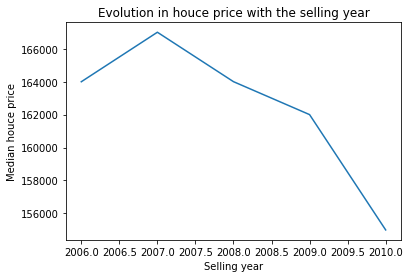

In [7]:
import matplotlib
# plot sale price vs year of the house selling
data.groupby('YrSold')[target].median().plot()
plt.xlabel('Selling year')
plt.ylabel('Median houce price')
plt.title('Evolution in houce price with the selling year')

**Note**:

We can see that there is a drops in the value of house which is unsual in real life.
Let's check the relation between the SalePrice and the status of the houce (age, remoded age, garage age)

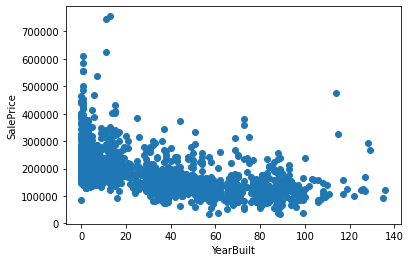

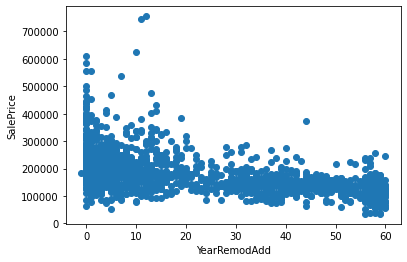

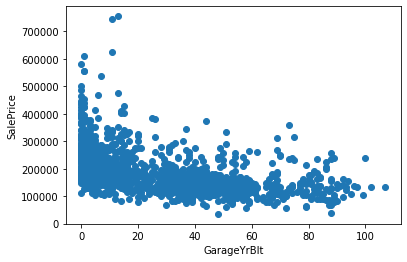

In [8]:
def analyse_temp_vars(df, temp_var):
    df = df.copy()
    
    df[temp_var] = df['YrSold'] - df[temp_var]
    plt.scatter(df[temp_var], df[target])
    plt.xlabel(temp_var)
    plt.ylabel(target)
    plt.show()

for var in temp_vars:
    if var != 'YrSold':
        analyse_temp_vars(data, var)   

**Note**:

- We can see that the price is decreased whith the house quality.

In [9]:
# Discrete Variables.
threshold = 20 # to decide discrete variable
disct_vars = [var for var in num_vars if len(data[var].unique())<threshold and var not in temp_vars + ['Id']]
print('Number of discrete variables: ', len(disct_vars))

Number of discrete variables:  14


In [10]:
data[disct_vars].head()
# These discrete values are grading scale (e.g OverQuality)

MSSubClass  OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  \
0          60            7            5             1             0         2   
1          20            6            8             0             1         2   
2          60            7            5             1             0         2   
3          70            7            5             1             0         1   
4          60            8            5             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   PoolArea  MoSold  
0         0       2  
1         0       5  
2         0       9  
3         0       2  
4         0      12

**Note:**

These discrete variables are grading scale(e.g. OverallQual), number of rooms(e.g. FullBath), ...

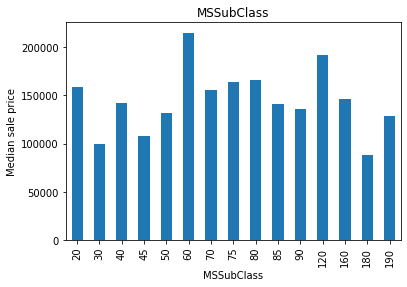

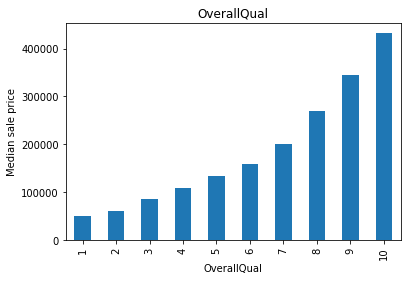

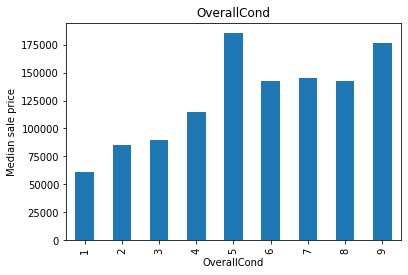

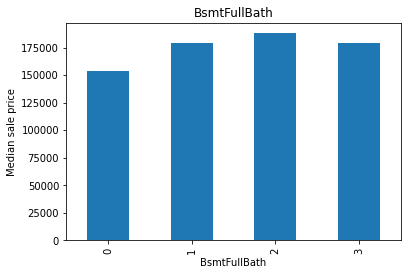

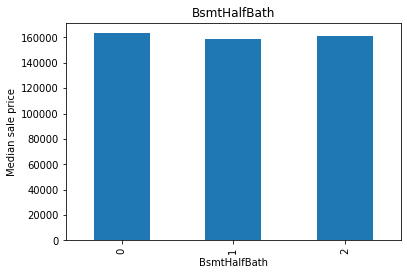

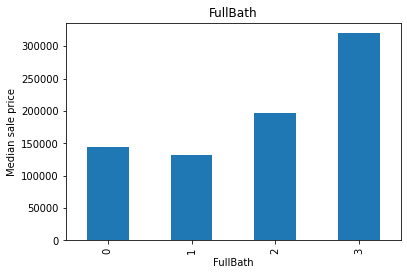

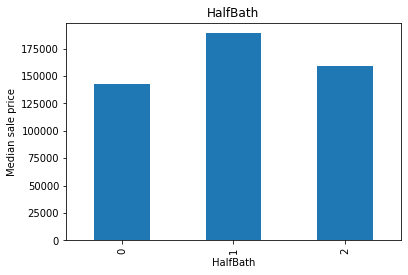

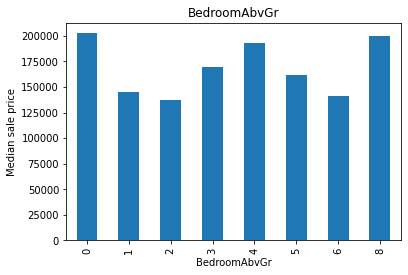

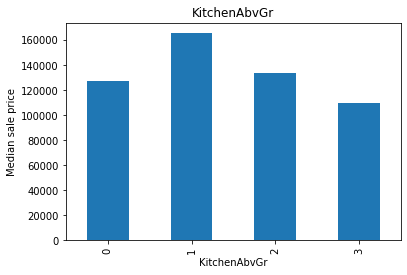

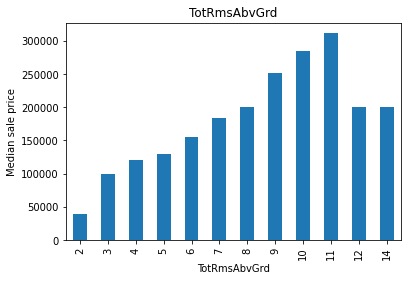

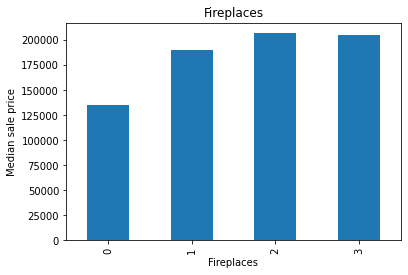

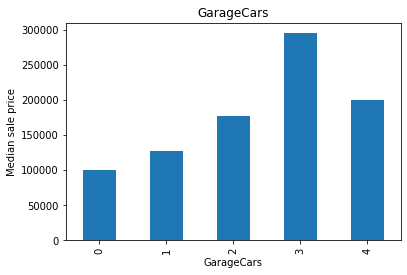

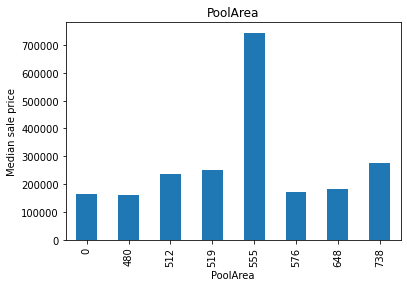

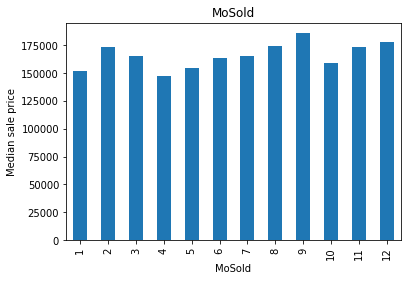

In [11]:
def analyse_discrete_variables(df, var):
    df = df.copy()
    df.groupby(var)[target].median().plot.bar()
    plt.ylabel('Median sale price')
    plt.title(var)
    plt.show()

for var in disct_vars:
    analyse_discrete_variables(data, var)

**Note:**

- We can see that there is a relation between the sale price and the the discrete variables. However, not all realtionships are monotonic. For example, for `OveralQuall`, the higher the quality the higher the price. For the `PoolArea`, the best price correlated with the median value. We have to be careful in engineering those variables to create a montoning relationship, in particular when using a linear model. To keep the tuto simple, we will not cover this part.

In [12]:
# Continues variables
# Here, continues variables are those which are not temporal or discrete
cont_vars =[var for var in num_vars if var not in disct_vars+['Id'] and var not in temp_vars]
print(f'Number of continues variables {len(cont_vars)}')

Number of continues variables 19


In [13]:
data[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
0           0           61              0          0            0        0   
1         298            0              0          0            0        0   
2           0           42              0          0            0        0   
3           0           35            272          0            0        0   
4         192           84              0          0            0        0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

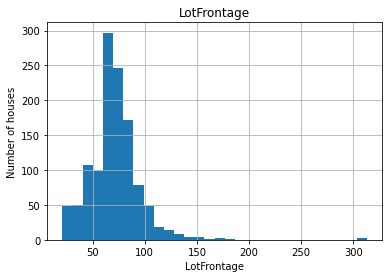

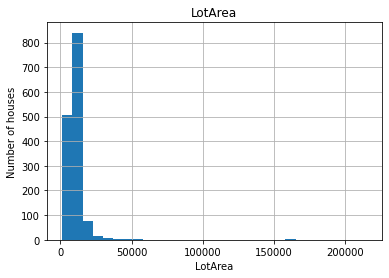

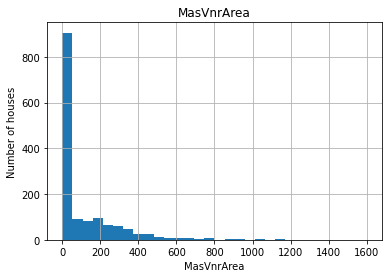

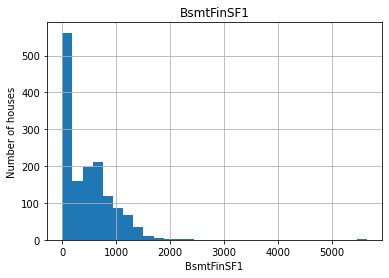

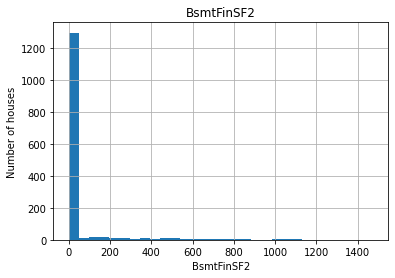

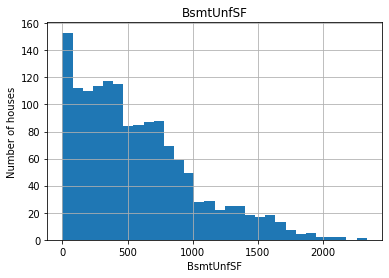

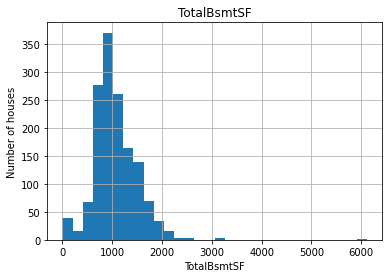

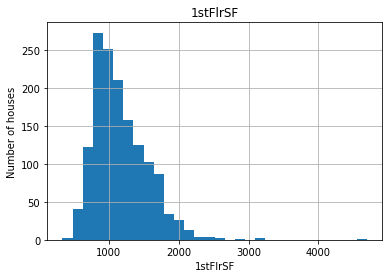

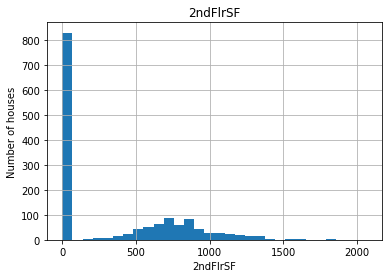

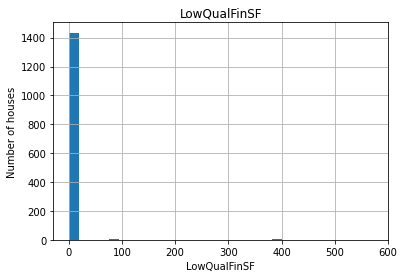

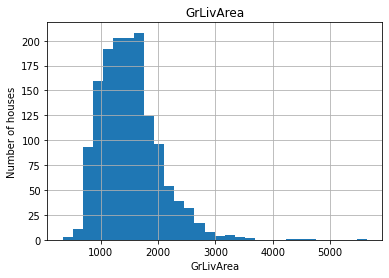

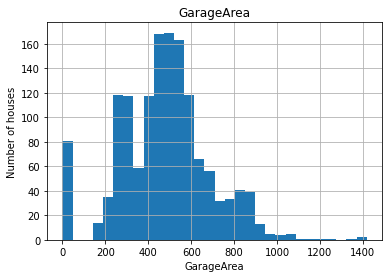

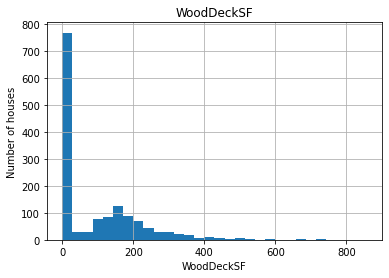

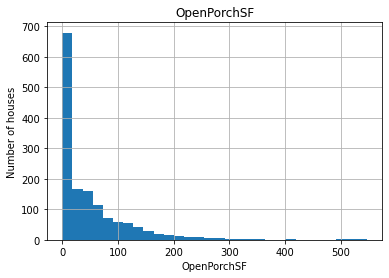

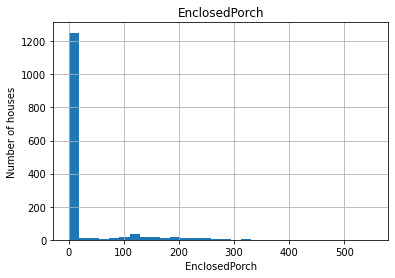

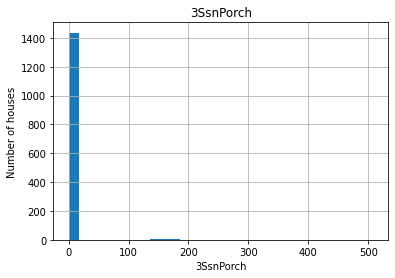

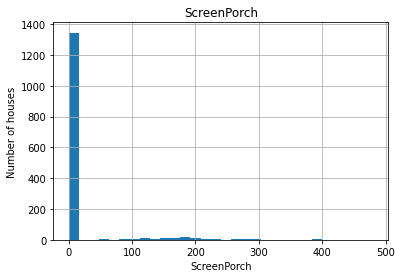

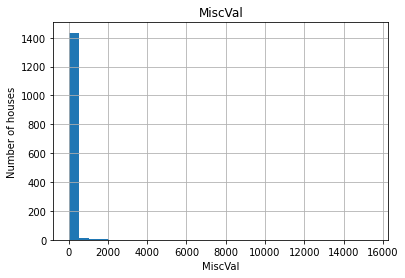

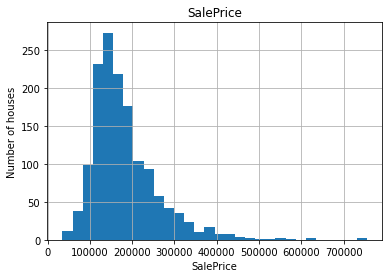

In [14]:
# Let's check the distribution of the continues variables
def dist_continues(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()

for var in cont_vars:
    dist_continues(data, var)


**Note:**

The variables are not normally distributed. As the linear model assume that the variables are normally distributed,
we need to `log_transform()` them to increase its performance. We will do that in the feature engnineering step.

In [15]:
# Categorical variables
cat_vars  = list(data.select_dtypes(include=['object']).columns)

print(f'Number of categorical variables', len(cat_vars))

Number of categorical variables 43


In [16]:
data[cat_vars].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [17]:
# Cardianlity of cat_vars
data[cat_vars].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

**Note:**
- It is worth noting that almost categorical variables has low cardianlity which is a good as we don't need to tackle the high cardinality problem.
-  Categorical variables could present some rare values. These values should be identified.

In [18]:
# Rare values
def analyse_rare_values(df, var, thresh):
    df = df.copy()
    df_pourc = df.groupby(var)['Id'].count() / len(df)
    
    return df_pourc[df_pourc<thresh]

for var in cat_vars:
    print(analyse_rare_values(data, var, 0.01))
    print('-----')

MSZoning
C (all)    0.006849
Name: Id, dtype: float64
-----
Street
Grvl    0.00411
Name: Id, dtype: float64
-----
Series([], Name: Id, dtype: float64)
-----
LotShape
IR3    0.006849
Name: Id, dtype: float64
-----
Series([], Name: Id, dtype: float64)
-----
Utilities
NoSeWa    0.000685
Name: Id, dtype: float64
-----
LotConfig
FR3    0.00274
Name: Id, dtype: float64
-----
LandSlope
Sev    0.008904
Name: Id, dtype: float64
-----
Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: Id, dtype: float64
-----
Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: Id, dtype: float64
-----
Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: Id, dtype: float64
-----
Series([], Name: Id, dtype: float64)
-----
HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: Id, dtype: float64
-----
RoofStyle
Flat       0.008904
Gambrel   

**Note:**

Some categorical variables have multiple labels that are present less than 1%. Those labels shoud be engineered and removed because they are tend to cause overfitting problem of machine learning model.

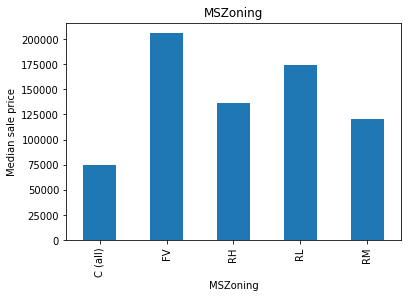

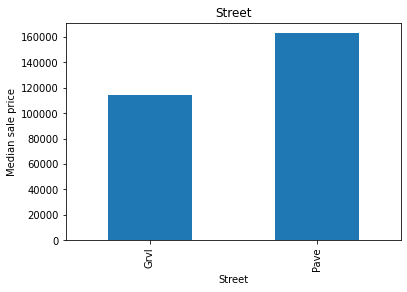

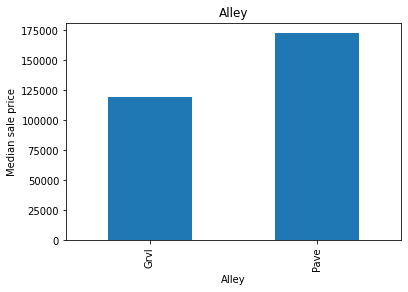

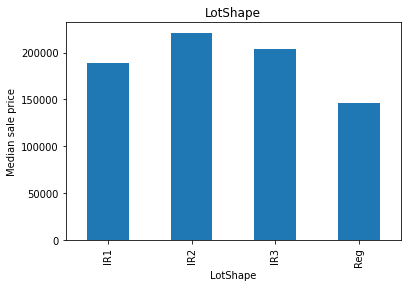

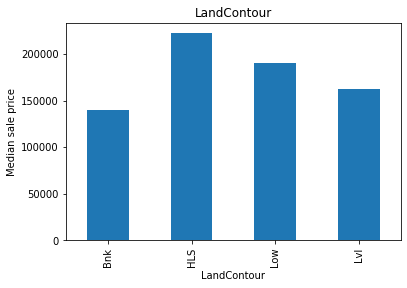

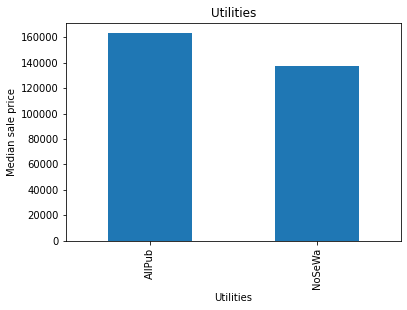

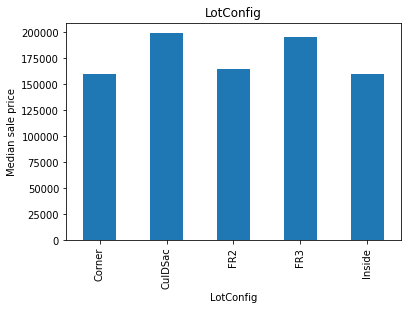

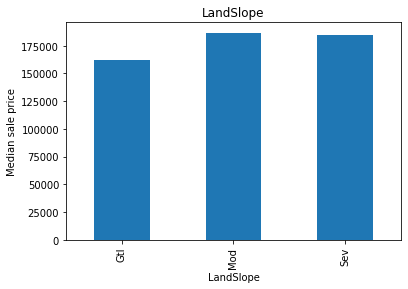

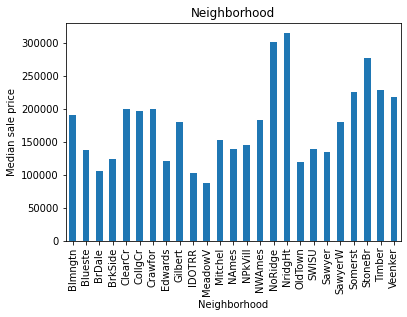

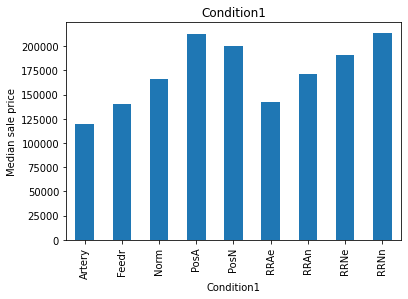

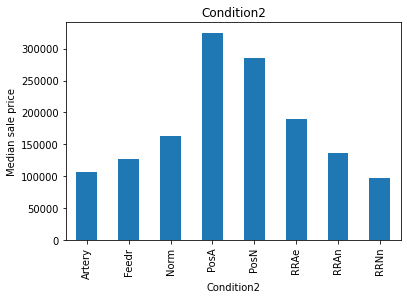

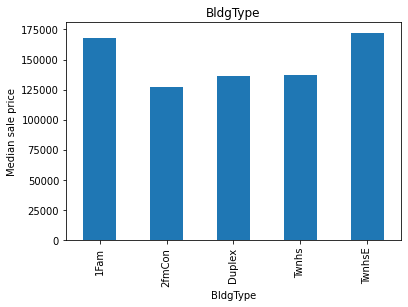

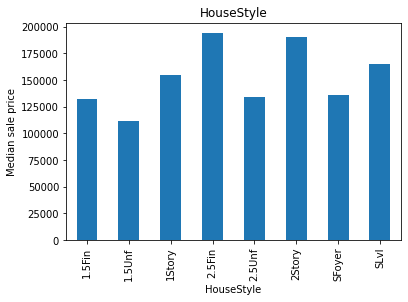

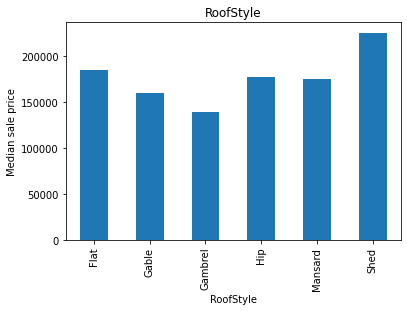

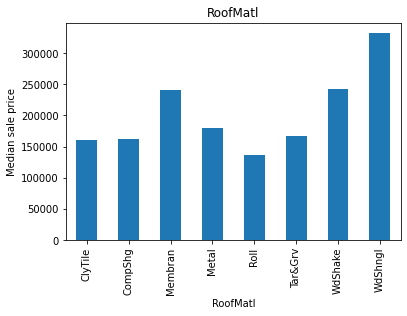

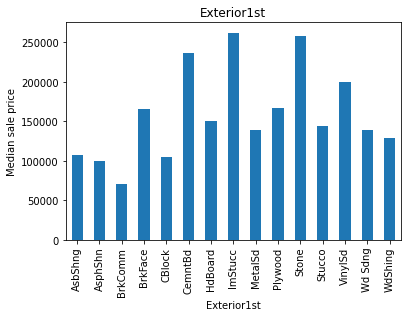

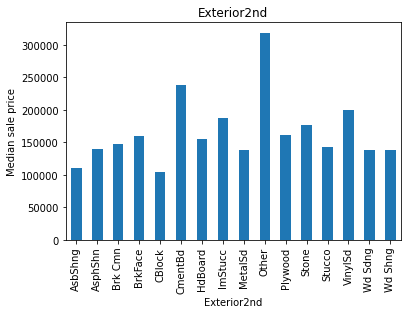

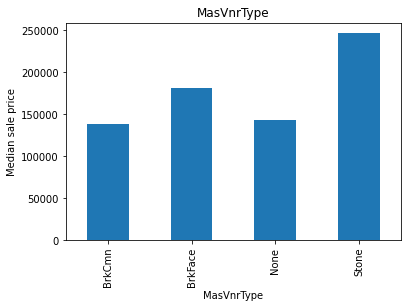

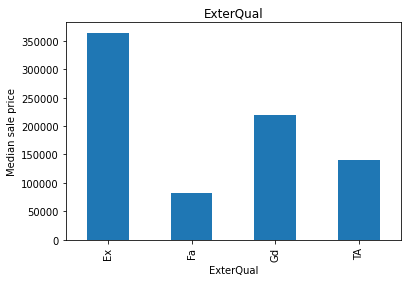

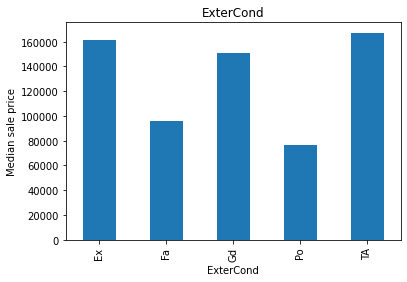

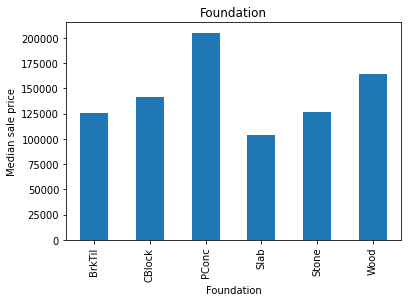

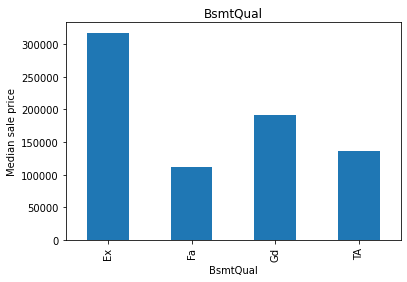

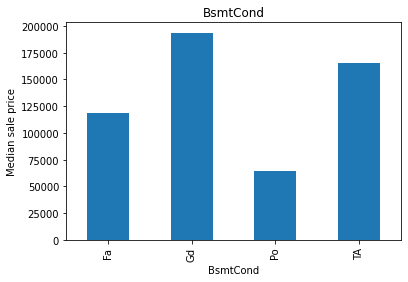

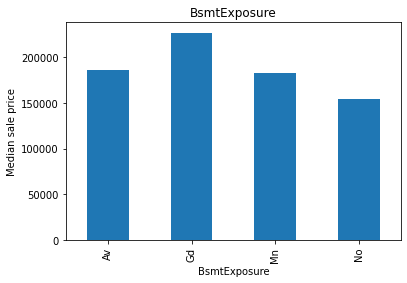

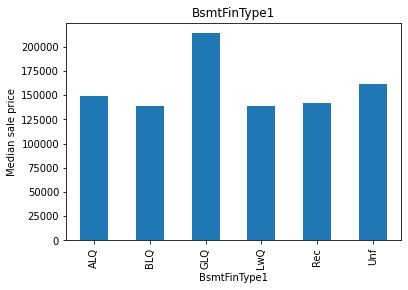

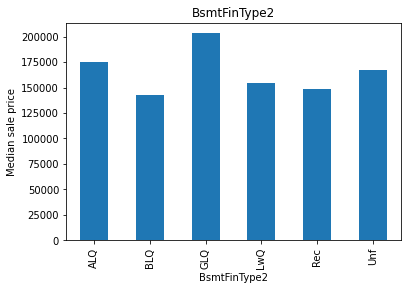

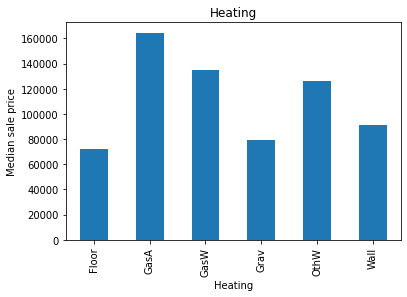

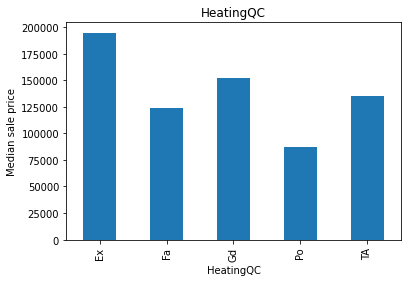

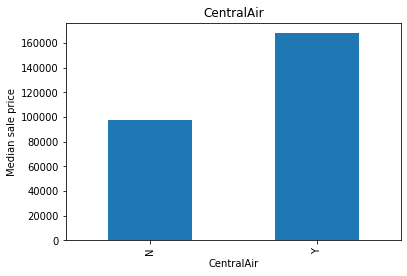

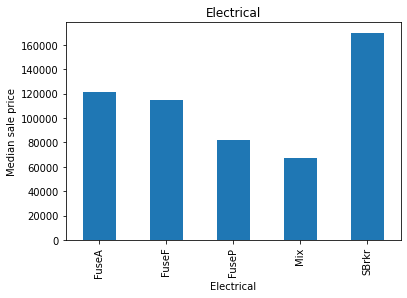

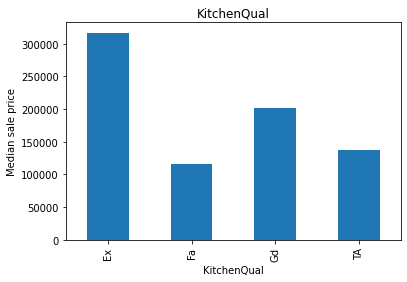

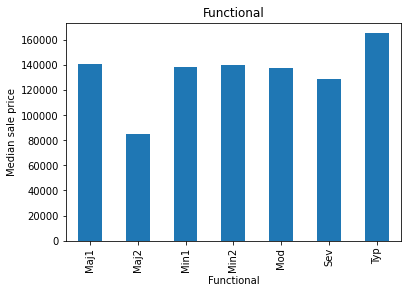

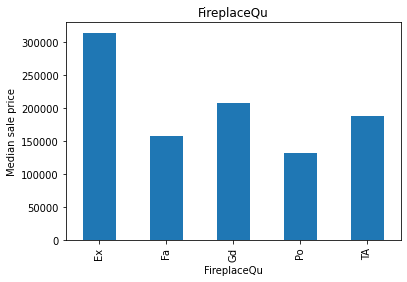

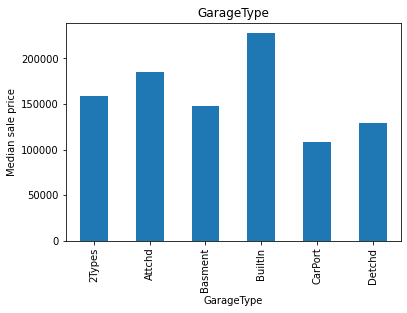

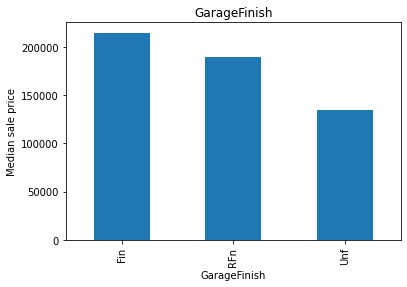

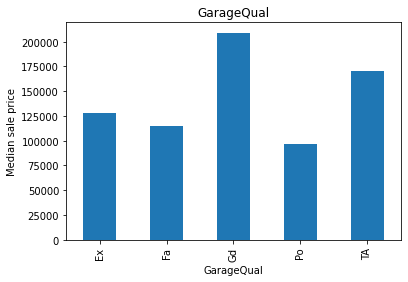

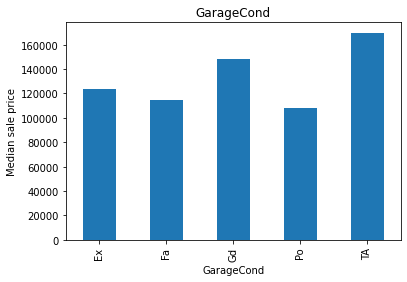

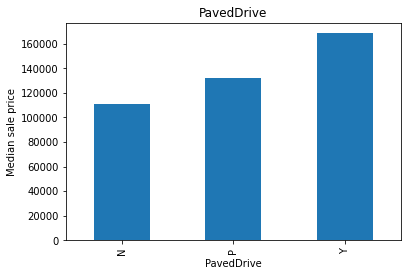

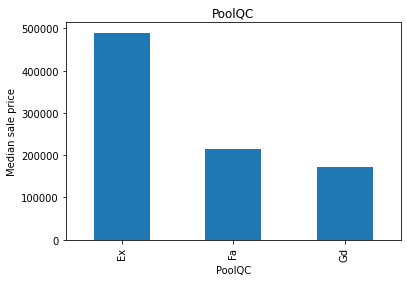

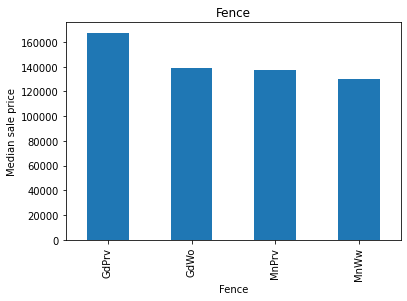

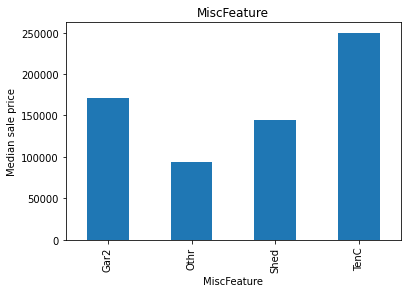

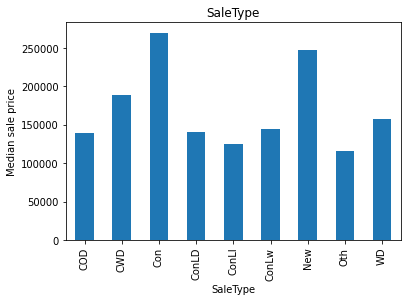

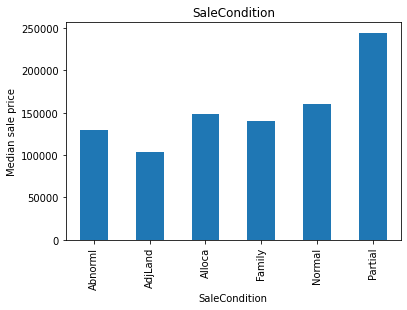

In [19]:
# Check realationship between categorical variables and sale price
for var in cat_vars:
    analyse_discrete_variables(data, var)

**Note:**

The categorical variables provide information about the sale price as for diffrent categories we have different 
price. However, the relationship is not monotonic. In the features engineering, we need to encode these categorical features
and transform them into a monotonic relationship with the target variable (sale price)

### <font color='Green'> <center> Data engineering </center> </font>

It is common practice in supervised machine learning to holdout a part of the available data as a test set. Some feature enignieering methods learn parameters from the data. It is import to learn them from training data to avoid the `overfitting` problem https://scikit-learn.org/stable/modules/cross_validation.html.    

`Overfitting`: refers to a model that fit too well the training data. In fact, the model learns the details and the noise in the data, which impact its performance on unseen data.

In [20]:
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore')

In [21]:
# to ensure the reporduicity of the result, we should fix the seed by giving a value to a random_state parameter.
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Id'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.1,
                                                    shuffle=True,
                                                    random_state=0)  

X_train.shape, X_test.shape

((1314, 80), (146, 80))

####  <center> Impute missing values </center> 

In [22]:
num_vars_with_na = [var for var in vars_with_nan if X_train[var].dtypes != 'O'] 

print('Pourcentage of NaN values for numerical variables:\n', X_train[num_vars_with_na].isnull().mean())

Pourcentage of NaN values for numerical variables:
 LotFrontage    0.177321
MasVnrArea     0.004566
GarageYrBlt    0.056317
dtype: float64


In [23]:
# Numerical values. We will replace the missing values by the mode value in the original variable.
for var in num_vars_with_na:
    mode_val = X_train[var].mode()[0] # the most frequently value in the column var
    X_train[var] = X_train[var].fillna(mode_val)
    X_test[var] = X_test[var].fillna(mode_val) # here we learn the mode value from the train data and we fill
                                                # both train and test data. 
# check if we fill correctly the missing values
# X_train[num_vars_with_na].isnull().mean()
X_test[num_vars_with_na].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

In [24]:
# Categorical values with NaN values
cat_vars_with_na = [var for var in vars_with_nan if X_train[var].dtypes == 'O']
print('Pourcentage of NaN values for categorical variables:\n', X_train[cat_vars_with_na].isnull().mean())

Pourcentage of NaN values for categorical variables:
 Alley           0.938356
MasVnrType      0.004566
BsmtQual        0.024353
BsmtCond        0.024353
BsmtExposure    0.025114
BsmtFinType1    0.024353
BsmtFinType2    0.025114
Electrical      0.000761
FireplaceQu     0.472603
GarageType      0.056317
GarageFinish    0.056317
GarageQual      0.056317
GarageCond      0.056317
PoolQC          0.995434
Fence           0.814307
MiscFeature     0.961187
dtype: float64


In [25]:
 # We can replace it with the most frequent value as well.
# But here we will create a new class `Unknown`
for var in cat_vars_with_na:
    X_train[var] = X_train[var].fillna('Unknown')
    X_test[var] = X_test[var].fillna('Unknown') # here we learn the mode value from the train data and we fill
                                                # both train and test data. 
# check if we fill correctly the missing values
# X_train[cat_vars_with_na].isnull().mean()
X_test[cat_vars_with_na].isnull().mean()

Alley           0.0
MasVnrType      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
Electrical      0.0
FireplaceQu     0.0
GarageType      0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
PoolQC          0.0
Fence           0.0
MiscFeature     0.0
dtype: float64

In [26]:
# create temporal variables that captures the elapsed time between between the SalePrice and the status of the houce (age, remoded age, garage age)

for var in temp_vars[:-1]:
    X_train[var] = X_train[temp_vars[-1]] - X_train[var]
    X_test[var] = X_test[temp_vars[-1]] - X_test[var]

**Note:**

We see that the coninues variables are not normally distributed.   
To improve the efficiency of Linear regression model, we will log-transform the positive values in order to get more likely Gaussian distribution.

In [27]:
for var in cont_vars:
    if X_train[var].min() > 0:
        print(var)
        X_train[var] = np.log(X_train[var])
        X_test[var] = np.log(X_test[var])


LotFrontage
LotArea
1stFlrSF
GrLivArea
SalePrice


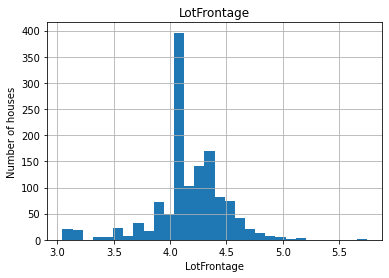

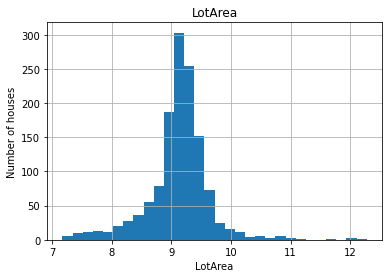

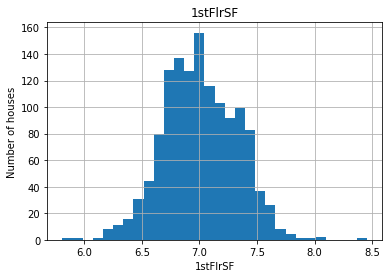

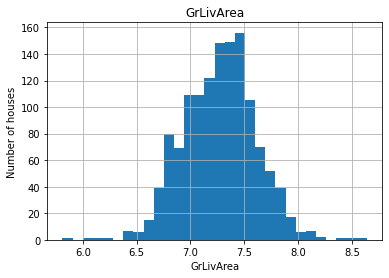

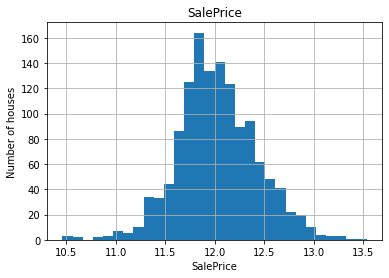

In [28]:
for var in cont_vars:
    if X_train[var].min() > 0:
        dist_continues(X_train, var)

In [29]:
# check that X_train and X_test does not contains NaN values
print(len([var for var in cont_vars if X_test[var].isnull().sum() > 0]))
print(len([var for var in cont_vars if X_train[var].isnull().sum() > 0]))

0
0


In [30]:
# Categorical variables: We will replace all the rare labels by a new label `rare`
def get_frequent_labels(df, var, thresh=0.01):
    df = df.copy()
    df_pourc = df.groupby(var)['SalePrice'].count() / len(df)
    
    return df_pourc[df_pourc>thresh].index
    
for var in cat_vars:
    freq_labels_index = get_frequent_labels(X_train, var, 0.01)
    X_train[var] = np.where(X_train[var].isin(freq_labels_index), X_train[var], 'rare', )
    X_test[var] = np.where(X_test[var].isin(freq_labels_index),X_test[var], 'rare')

**Note:**

Encoding categorical values means replacing the string labels by  numerical values. To better improve the linear model, we can encode the labels in a monotonic relationship with the target variable.

If we have `K` labels:

We will assign numbers following the mean of the target value for that label. So labels for which the mean of the target is higher will get the number 0, and those where the mean of the target is smallest will get the number K-1.

We will encode this function from scratch. However, in the next projects we can use  `OrdinalCategoricalEncoder()` from  `Feature-engine library` https://feature-engine.readthedocs.io/en/latest/encoders/OrdinalCategoricalEncoder.html

In [31]:
def ordinal_categorical_encoder(var, target, train, test):
    ordered_categories = train.groupby([var])[target].mean().sort_values(ascending=False).index
    ordinal_label = {k: i for i, k in enumerate(ordered_categories, 0)}
        
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)            

In [32]:

for var in cat_vars:
    ordinal_categorical_encoder(var, target, X_train, X_test)

**Note:**

Feature scaling through `standardization`, `min-max sclaer`, etc is an important step for almost all machine learning algorithms (not necessary for tree-based model). The goal is simply to get the data into the same scale. In fact, if the features have different scales, this can affect the training process. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. 

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# we will use the standard scaler from scikit-learn
scaler = StandardScaler()

# fit the scaler on the train data and drop the target 
train_vars = list(X_train.columns)
train_vars.remove(target)
scaler = scaler.fit(X_train[train_vars])
X_train[train_vars] = scaler.transform(X_train[train_vars])
X_test[train_vars] = scaler.transform(X_test[train_vars])

# here we can save the feature engineering results

X_train.to_csv('train_data.csv', index=False)
X_test.to_csv('test_data.csv', index=False)

### <font color='Green'> <center> Feature selection </center> </font>

The goal of feature selection is to discard irrelevant features and select the most predictive ones in order to build the machine learning model. This helps building simpler and more interpretable model.  

Scikit-learn provides several techniques for feature selection https://scikit-learn.org/stable/modules/feature_selection.html

We will use the Lasso (or L1) regression model to discard the irrelevant features. Lasso has the property that is able to shrink some of the coefficients to zero.

In [34]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [35]:
X_train = pd.read_csv('train_data.csv')
y_train = X_train['SalePrice']
# drop the 'SalePrice'
X_train.drop(['SalePrice'], axis=1, inplace=True)

X_test = pd.read_csv('test_data.csv')
y_test = X_test['SalePrice']
# drop the salePrice
X_test.drop(['SalePrice'], axis=1, inplace=True)

In [36]:
feature_selector = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_selector.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [37]:
# print the relevant features
feature_selector.get_support()

array([False,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
       False,  True,  True, False, False, False,  True, False,  True,
        True, False, False, False,  True,  True,  True])

In [38]:
selected_features = X_train.columns[(feature_selector.get_support())]
print(f'Original features: {X_train.shape[1]}')
print(f'Selected features: {len(selected_features)}')
print(f'Shrinked features: {np.sum(feature_selector.estimator_.coef_ == 0.0)}')

Original features: 79
Selected features: 50
Shrinked features: 29


### <font color='Green'> <center> Machine learning model </center> </font>

Reference: Hands-on Machine learning with scikit-learn and tensorflow
####  Linear regression model:
- $\hat y = \theta_0  + \theta_1 \times x_1 + \theta_2 \times x_2 + ... + \theta_n \times x_n$  
- $\hat y$ : is the predict value
- A linear model makes a prediction by simply computing a weighted sum of the input features + a constant called the `bias term or intercept term`.
- We can write it as : $\hat y = h_\theta (x) = \Theta.X$, i.e **X**: is the features vector and $\Theta$ is the parameter vector.
- To train a linear regression model, we need to find the value $\Theta$ that minimize the loss function.
- The most common loss function of a regression model is Root Mean Square Error (RMSE). In practice, it is simpler to minimize the Mean square Error (MSE).
- There is a closed form solution: $\hat \Theta = (X^TX)^-1 X^T y$.
- This approach is very useful for small datasets (small number of features). The computaional complexity to calculate the inverse of $(X^TX)$ is typically about $\mathcal{O}(n^3)$, with very large number of feature it could be very computational.



**Gradient descent approach:**

- A very generic optimization  algorithm capable of finding optimal solution to several problems.
- Tweak model's parameters iteratively in order to minimize a cost function.
- ```Suppose that someone is lost in a mountain in a dense, so that he only feel the slope of the ground. A good strategy to get the bottom quickly is to go downhill in the direction of the steepest slope. This what gradient descent does. It measures the gradient of the loss function with respect to the parameters vector``` $\Theta$ ```and it goes in the direction of descenting gradient. It reached the minimum when the gradient is zero!```

<center><img src="../assets/GD.png" width="600"></center>
 

- An important parameter is the learning rate/step parameter.
<center><img src="../assets/gd_2.png" width="600"></center>
- Not all loss functions are convex functions (nice regular bowls). There may be holes, ridges, plateaus, etc making convergence to the minimum very difficult
<center><img src="../assets/gd_3.png" width="600"></center>

- Fortunately, for the linear regression, the loss function MSE is a convex function. 
- A convex function means if you peak any two points on the curve, `the segment line joining them never crosses the curve.`
- To implement the gradient descent, we need to calculate the gradient of the loss function w.r to model each parameters which can be done using three strategies:
    - **Batch gradient descent:**
        - use the whole dataset to claculate the gradient and update the parameters (very slow if the datset is too large.
    - **Stochastic gradient descent**:
        - it is the opposite extreme. It calculates the gradient only on one single instance (picked randomly from the training set).
        - This way, gradient descent an be very fast and we can train with very huge dataset.
        - However, it is less regular due to its stochastic (random) nature. The loss function will bounces up and down decreasing only on average.
        - If the cost function is very irregular, this can help the algorith jump the local minima, but in the same time the algorithm can never settle at the minimum.
        - One solution is to reduce gradually the learning rate.
    - **mini-batch gradient descent**:
        - At each step, we compute the gradient on a small random set of instances called `mini-batch`.
        - The loss function will be less irregular compared to stochastic gradient descent, especially with fairly large min-batch.
        - It may be harder to escape a local minima.

<center><img src="../assets/gd_4.png" width="600"></center>

In [39]:
# This implement the closed form solution 
from sklearn.linear_model import LinearRegression 

# This implement the gradient descent solution.
from sklearn.linear_model import SGDRegressor

from math import sqrt
# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [41]:
model = LinearRegression(n_jobs=-1)

# train the model

model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [42]:
# Predictions on training set
pred = model.predict(X_train)

# Calculate mse and rmse
print(f'train mse: {mean_squared_error(np.exp(y_train), np.exp(pred))}')
print(f'train mae: {mean_absolute_error(np.exp(y_train), np.exp(pred))}')
print(f'train r2: {r2_score(np.exp(y_train), np.exp(pred))}')

print ('----------------------------')
# Predictions on test set
pred = model.predict(X_test)

# Calculate mse and rmse
print(f'test mse: {mean_squared_error(np.exp(y_test), np.exp(pred))}')
print(f'test mae: {mean_absolute_error(np.exp(y_test), np.exp(pred))}')
print(f'test r2: {r2_score(np.exp(y_test), np.exp(pred))}')


train mse: 691389248.7103081
train mae: 15002.337223811419
train r2: 0.8892684392569945
----------------------------
test mse: 1368755275.4323893
test mae: 18049.565325801268
test r2: 0.8008247507006451


Text(0.5, 1.0, 'Evaluation of Linear regression Predictions')

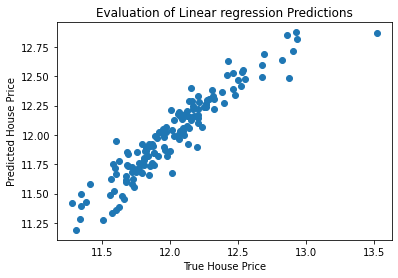

In [43]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Linear regression Predictions')

In [44]:
# Fit SGDRegressor 
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.001, random_state=0)
sgd_reg.fit(X_train, y_train)

SGDRegressor(eta0=0.001, penalty=None, random_state=0)

In [45]:
# Predictions on training set
pred = sgd_reg.predict(X_train)

# Calculate mse and rmse
print(f'train mse: {mean_squared_error(np.exp(y_train), np.exp(pred))}')
print(f'train mae: {mean_absolute_error(np.exp(y_train), np.exp(pred))}')
print(f'train r2: {r2_score(np.exp(y_train), np.exp(pred))}')

print ('----------------------------')
# Predictions on test set
pred = sgd_reg.predict(X_test)

# Calculate mse and rmse
print(f'test mse: {mean_squared_error(np.exp(y_test), np.exp(pred))}')
print(f'test mae: {mean_absolute_error(np.exp(y_test), np.exp(pred))}')
print(f'test r2: {r2_score(np.exp(y_test), np.exp(pred))}')

train mse: 910969684.3402721
train mae: 18430.083540481537
train r2: 0.8541008626837541
----------------------------
test mse: 1740640150.1082036
test mae: 21207.356183718024
test r2: 0.746709698906002


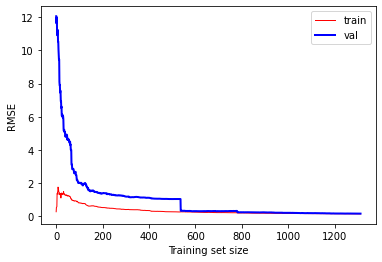

In [46]:
# Learning curves: (modified from Reference)
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    fig = plt.figure()
    ax = plt.axes()
    train_plt = plt.plot(np.sqrt(train_errors), "r-", linewidth=1, label="train")
    val_plt = plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
#     plt.legend(handles=train_plt, loc='best')
#     plt.legend(handles=val_plt, loc='best')
    plt.legend()
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.show()

    
plot_learning_curves(sgd_reg, X_train, y_train, X_test, y_test)

**Notes**
- We can see that the training loss start at zero when there are just 1 or 2 samples in the training set, i.e the model can fit perfectly, at the same time the validation loss start very high because the model can not do well on the unseen data. `It is the overfitting !`
- As we add new instances into the training data, the model cannot fit perfectly the data because the data is noisy and also not linear at all. The training error goes up then decreases to reach a small value.
- In the same time, the validation loss slowly goes down and reaches a small value as the model start to learn and generalize on unseen data.
- These curves is a typical of good learning as both curves reach small values.

#### Bias / Variance tradeoff:
The machine learning model's generalization error can be expressed as the sum of three errors:
 - Bias : this part is due to wrong assumptions, such as assuming that the data is linear when it is not. A high bias model is most likely to underfit the training data. In practice, the train error and the validation error are both high
 - Variance: this part is due to the model's excessive sensitivity to small variations in the trainin data. A model with many degrees of freedom (e.g. high-degree polynomial model) is likely to have a high variance, and thus overfit the training data. In practice, the train error is very low and the validation error is very high.
 - Irreductible error: This part is due to the noises of the data itself. The only way  to reduce this is to clean up the data.

#### How to deal with overfitting:
- A good way to tackle the overfitting is to regularize the model, (i.e add contraints). 
- Reduce degrees of freedom, i.e. the fewer degrees of freedom the harder for the model to overfit.
- A typical way to regularize a linear model is to constraint its weights to not be very large.
- There are 3 different ways to constraints the weights:

**Ridge regression:**
- It adds a `regularization term` $\alpha \sum_{i=1}^n \theta_i^2$ to the cost function.
- This will foces the model not only to fit the data but also keep the weights as small as possible.
- The parameters alpha controls how much we want to regularize the model. i.e $\alpha = 0$ means no regularization, if $\alpha $ is very large, all weights will ends with very close to zero.

**Lasso Regression**
- It stands for `Least Absolute Shrinkage and Selection Operator` regression.
- Just like Ridge Regression, It adds a regularization term $\alpha \sum_{i=0}^n |\theta_i|$ to the cost function.
- It uses the $L_1$ norm instead of $L_2$ norm as in the previous technique.
- A very fundamental characteritic of Lasso regression is that it tends to completely discard the least important features (e.g. zeroes its weights). It generates a sparse model.

**Elastic Net**
- It is a mix of Ridge and Lasso regression.
- It adds this term: $r\alpha \sum_{i=0}^n |\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^n \theta_i^2$ where r control the mix.

Scikit-learn implements these techniques as 3 estimators **Ridge(), Lasso(), ElasticNet()** 

*Read  pages 136-142*




#### Early Stopping:
- It is a different way to regularize the iterative learning algorithm such as gradient descent.
- We stop the learning process as soon as the validation error reaches a minimum.

<center><img src="../assets/early_stopping.png" width="600"></center>
*Read  pages 142-143*